### Linear Regression with TensorFlow (graph based)

This notebook demonstrates linear regression using plain old tensorflow working on graphs.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'1.10.1'

In [0]:
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217]
x = np.asarray(x, np.float32)
y = np.asarray(y, np.float32)

### Numpy code for the RSS

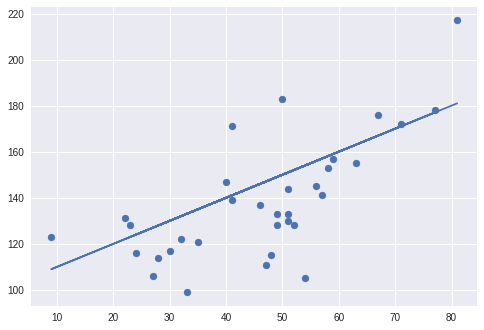

In [4]:
a = 1
b = 100
plt.scatter(x,y)
plt.plot(x,(a*x)+b);

### TASK: Calculate the RSS using numpy

How good is the fit? Calculate the sum of all quadratic differences?

$$
\hat{y} = a*x + b \\
RSS = \sum_i (\hat{y_i} - y_i)^2
$$

The result should be 13469.0

In [5]:
y_hat = a*x + b
r = (y_hat - y)
np.sum(r**2)

13469.0

### TASK: Calculate the RSS using TensorFlow

In [0]:
# Defining the graph (construction phase)
tf.reset_default_graph()
a  = tf.Variable(1.0) #We can optimize them later
b = tf.Variable(100.0)
x_ = tf.constant(x) #These are fixed, we could also use placeholders
y_ = tf.constant(y)
y_hat_ = a*x_ + b
r_ = y_ - y_hat_
rss = tf.reduce_sum(tf.square(y_ - y_hat_))
init_op = tf.global_variables_initializer() 
# Initialization ('symbolic'), this creates a new operation in the graph. Which
# initializes the graph. We call this later, when we have a concrete realization of the graph

In [7]:
with tf.Session() as sess: 
    sess.run(init_op) #Doing the initialization on the concrete realization of the graph
    rss_val = sess.run(rss)
    print(rss_val)

13469.0


In [8]:
# Let's add an optimizer to the loss 
loss = rss #This is usually called loss and we want to minimize the loss.
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(loss) 
init_op = tf.global_variables_initializer()
with tf.Session() as sess: 
    sess.run(init_op) #Doing the initialization on the concrete realization of the graph
    for i in range(100000):
      _,a_val, b_val, loss_val = sess.run([train_op,a,b, loss])
      if (i % 10000 == 0): #Trick not to print so often
        print(a_val, b_val, loss_val)

0.79056 99.99506 13469.0
0.9907443 93.59946 11652.306
1.0500584 90.5226 11553.3955
1.0785762 89.04327 11530.518
1.0922973 88.33149 11525.226
1.0988524 87.991455 11524.004
1.1020921 87.823395 11523.712
1.1035628 87.7471 11523.65
1.1040179 87.723495 11523.639
1.1040179 87.723495 11523.639


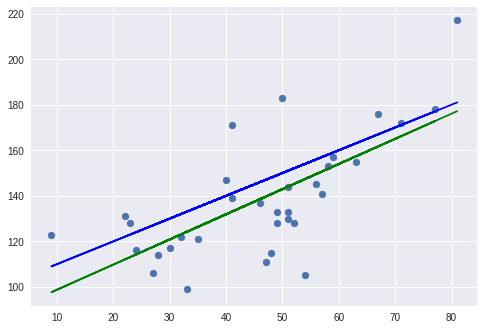

In [9]:
plt.scatter(x,y)
plt.plot(x,(1*x)+100, c='b') # Initial guess
plt.plot(x,(a_val*x)+b_val, c='g')   # After optimizing

### Task: Optimize the optimizer

* Change the learning rate to very high values and see what happens
* Change the optimizer to ```train_op = tf.train.AdamOptimizer().minimize(loss)``` and see what happens.

In [10]:
loss = rss #This is usually called loss and we want to minimize the loss.
train_op = tf.train.GradientDescentOptimizer(learning_rate=1000).minimize(loss)
train_op = tf.train.AdamOptimizer().minimize(loss)
init_op = tf.global_variables_initializer()
with tf.Session() as sess: 
    sess.run(init_op) #Doing the initialization on the concrete realization of the graph
    for i in range(30000):
      _,a_val, b_val, loss_val = sess.run([train_op,a,b, loss])
      if (i % 1000 == 0): #Trick not to print so often
        print(a_val, b_val, loss_val)

0.999 99.999 13469.0
0.8779933 99.43335 12030.176
0.892712 98.67535 11967.005
0.9093408 97.81647 11900.501
0.9265598 96.92567 11837.229
0.94391197 96.02699 11779.283
0.961121 95.13515 11727.628
0.9781326 94.25318 11682.266
0.9948875 93.38432 11643.153
1.0113126 92.53244 11610.168
1.0273103 91.70266 11583.146
1.0427604 90.90123 11561.838
1.0574712 90.13813 11545.919
1.0711579 89.428116 11534.936
1.0833731 88.794426 11528.252
1.0934955 88.27219 11524.951
1.1004643 87.906685 11523.832
1.1040039 87.72413 11523.639
1.1049325 87.675964 11523.632
1.1049932 87.671585 11523.629
1.1050217 87.67144 11523.629
1.1050218 87.671425 11523.627
1.1050215 87.671425 11523.628
1.1050217 87.67143 11523.629
1.1050224 87.67142 11523.627
1.1050215 87.67142 11523.629
1.1050218 87.671425 11523.629
1.105006 87.671425 11523.629
1.1050217 87.67142 11523.629
1.1050217 87.671425 11523.629


### Fitting with scikit-learn

Linear regression is usually not fitted using a Gradient-Descent, there are specialliezed methods for that. 

In [11]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1), y)
pred = regr.predict(x.reshape(-1,1))
np.sum((pred - y)**2)

11523.626

In [12]:
regr.get_params(True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

## Keras code for the RSS

If you build more complex models, its usually easier to use a more high level languages than TensorFlow like e.g. keras. Here, we show you how to use keras for linear regression.

In [0]:
from tensorflow import keras

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(1,input_dim=1, activation='linear'))

opt = optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
#keras.optimizers.TFOptimizer(optimizer)
#opt = optimizers.RMSprop(lr=0.01)

model.compile(loss='mean_squared_error',
              optimizer=opt)


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Quite a hack to set the starting values in keras 
#(usually not needed so much in DL)
a_ini=np.array(1,dtype="float32",ndmin=2)
b_ini=np.array(100,dtype="float32",ndmin=1)
model.set_weights([a_ini,b_ini])

In [18]:
a_keras,b_keras=model.get_weights()
print("slope=",a_keras[0][0],"intercept=",b_keras[0])

slope= 1.0 intercept= 100.0


In [19]:
for i in range(0,30000):
    model.fit(x=x,y=y,batch_size=33,
                    epochs=1,
                    verbose = 0)
    a,b=model.get_weights()
    if i % 1000==0:
        RSS=np.sum(np.square(model.predict(x).reshape(len(x),)-y))
        print("Epoch:",i,"slope=",a[0][0],"intercept=",b[0],"RSS=",RSS)

Epoch: 0 slope= 0.93653333 intercept= 99.998505 RSS= 12457.342
Epoch: 1000 slope= 0.87262154 intercept= 99.72697 RSS= 12055.715
Epoch: 2000 slope= 0.87772596 intercept= 99.46218 RSS= 12032.596
Epoch: 3000 slope= 0.8827264 intercept= 99.20278 RSS= 12010.451
Epoch: 4000 slope= 0.88758457 intercept= 98.95077 RSS= 11989.405
Epoch: 5000 slope= 0.89234966 intercept= 98.70359 RSS= 11969.215
Epoch: 6000 slope= 0.89702773 intercept= 98.46092 RSS= 11949.825
Epoch: 7000 slope= 0.9015869 intercept= 98.22441 RSS= 11931.345
Epoch: 8000 slope= 0.9060376 intercept= 97.99354 RSS= 11913.703
Epoch: 9000 slope= 0.9104153 intercept= 97.76646 RSS= 11896.728
Epoch: 10000 slope= 0.91468024 intercept= 97.545204 RSS= 11880.553
Epoch: 11000 slope= 0.9188454 intercept= 97.32915 RSS= 11865.105
Epoch: 12000 slope= 0.92295325 intercept= 97.116066 RSS= 11850.2
Epoch: 13000 slope= 0.92692405 intercept= 96.91007 RSS= 11836.112
Epoch: 14000 slope= 0.9308362 intercept= 96.70714 RSS= 11822.533
Epoch: 15000 slope= 0.934659

### Extending the linear model

In [0]:
m2 = Sequential()
m2.add(Dense(10,input_dim=1, activation='relu'))
#m2.add(Dense(10,input_dim=1, activation='relu'))
m2.add(Dense(1,input_dim=1, activation='linear'))
opt = optimizers.Adam()
m2.compile(loss='mean_squared_error', optimizer=opt)

In [21]:
m2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [22]:
for i in range(0,30000):
    m2.fit(x=x,y=y,batch_size=33,
                    epochs=1,
                    verbose = 0)
    if i % 1000==0:
        RSS=np.sum(np.square(m2.predict(x).reshape(len(x),)-y))
        print("Epoch:",i, "RSS=",RSS)

Epoch: 0 RSS= 917306.56
Epoch: 1000 RSS= 90407.0
Epoch: 2000 RSS= 37574.152
Epoch: 3000 RSS= 37097.14
Epoch: 4000 RSS= 36393.562
Epoch: 5000 RSS= 35440.387
Epoch: 6000 RSS= 34212.938
Epoch: 7000 RSS= 32556.057
Epoch: 8000 RSS= 29832.037
Epoch: 9000 RSS= 25232.45
Epoch: 10000 RSS= 19455.787
Epoch: 11000 RSS= 14656.673
Epoch: 12000 RSS= 12189.36
Epoch: 13000 RSS= 11569.833
Epoch: 14000 RSS= 11524.078
Epoch: 15000 RSS= 11523.634
Epoch: 16000 RSS= 11523.627
Epoch: 17000 RSS= 11523.627
Epoch: 18000 RSS= 11523.63
Epoch: 19000 RSS= 11523.629
Epoch: 20000 RSS= 11523.636
Epoch: 21000 RSS= 11523.629
Epoch: 22000 RSS= 11523.631
Epoch: 23000 RSS= 11523.629
Epoch: 24000 RSS= 11523.627
Epoch: 25000 RSS= 11523.631
Epoch: 26000 RSS= 11523.632
Epoch: 27000 RSS= 11523.628
Epoch: 28000 RSS= 11523.633
Epoch: 29000 RSS= 11523.632


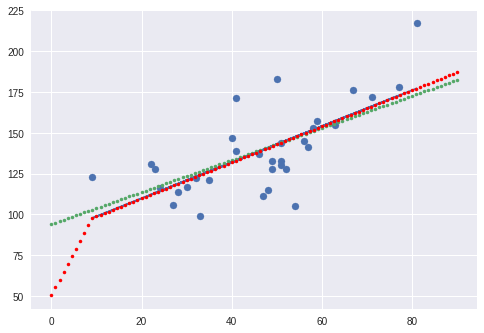

In [23]:
plt.scatter(x,y)
plt.plot(x,(a_val*x)+b_val)
x2 = np.linspace(0,90,100)
plt.plot(x2,model.predict(x2),'.')
plt.plot(x2,m2.predict(x2),'.r')